In [1]:
%matplotlib inline

In [2]:
import numpy as np # For random bit and basis generation
from qiskit import QuantumCircuit, transpile # For creating and transpiling quantum circuits
from qiskit.visualization import plot_histogram, plot_bloch_multivector # For visualizing results and states
from qiskit.quantum_info import Statevector # For accessing the quantum state of the circuit
from qiskit_aer import AerSimulator # For simulating quantum circuits
from IPython.display import display, Markdown # For displaying markdown in Jupyter notebooks

# Set up the quantum simulator from Qiskit Aer
simulator = AerSimulator()

# Function to create the BB84 quantum circuit based on Alice's random bits and bases
def create_bb84_circuit(bits, bases):
    num_qubits = len(bits) # Determine the number of qubits based on the length of the bits
    qc = QuantumCircuit(num_qubits, num_qubits) # Initialze the quantum circuit with classical bits for measurement
    for i in range(num_qubits):
        if bases[i] == 1: # Apply a Hadamard gate if the basis is 1 (measurement in X-basis)
            qc.h(i)
        if bits[i] == 1: # Apply an X gate (bit flip) if the bit is 1 (encoding a 1)
            qc.x(i)
        if bases[i] == 1: # Apply another Hadamard gate to revert to original basis if basis is 1
            qc.h(i)
    qc.barrier() # Add a barrier for visual separation in the circuit diagram
    return qc, bits, bases # Return the circuit and the corresponding bits and bases

# Function to visualize the qubits after creation (initial states before measurement)
def visualize_qubit_creation(qc):
    display(Markdown("### Circuit Diagram: Qubit State After Creation")) # Display markdown header
    state = Statevector.from_instruction(qc) # Get the quantum state from the circuit
    plot_bloch_multivector(state, title="Qubit States After Creation") # Visualize the state using a Bloch sphere
    display(qc.draw(output='mpl')) # Display the circuit diagram



In [3]:


# Function to measure the qubits in the selected bases (Bob's measurement step)
def measure_in_bases(qc, bases):
    for i, base in enumerate(bases):
        if base == 1: # Apply Hadamard gate for measurement in the X-basis
            qc.h(i)
        qc.measure(i, i) # Measure each qubit into the corresponding classical register
    qc.barrier() # Add a barrier for visual separation after measurement

# Function to visualize the measurement process (Bob's measurement)
def visualize_measure_in_bases(qc):
    display(Markdown("### Recipient Reading Data from Quantum Bits")) # Display markdown header
    display(qc.draw(output='mpl')) # Display the circuit diagram showing the measurement


### Circuit Diagram: Qubit State After Creation

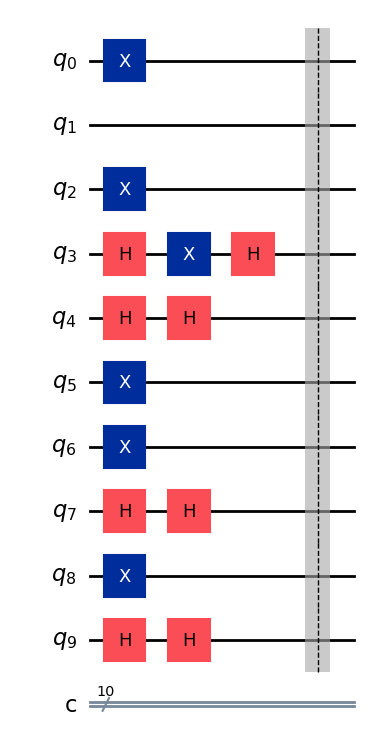

### Recipient Reading Data from Quantum Bits

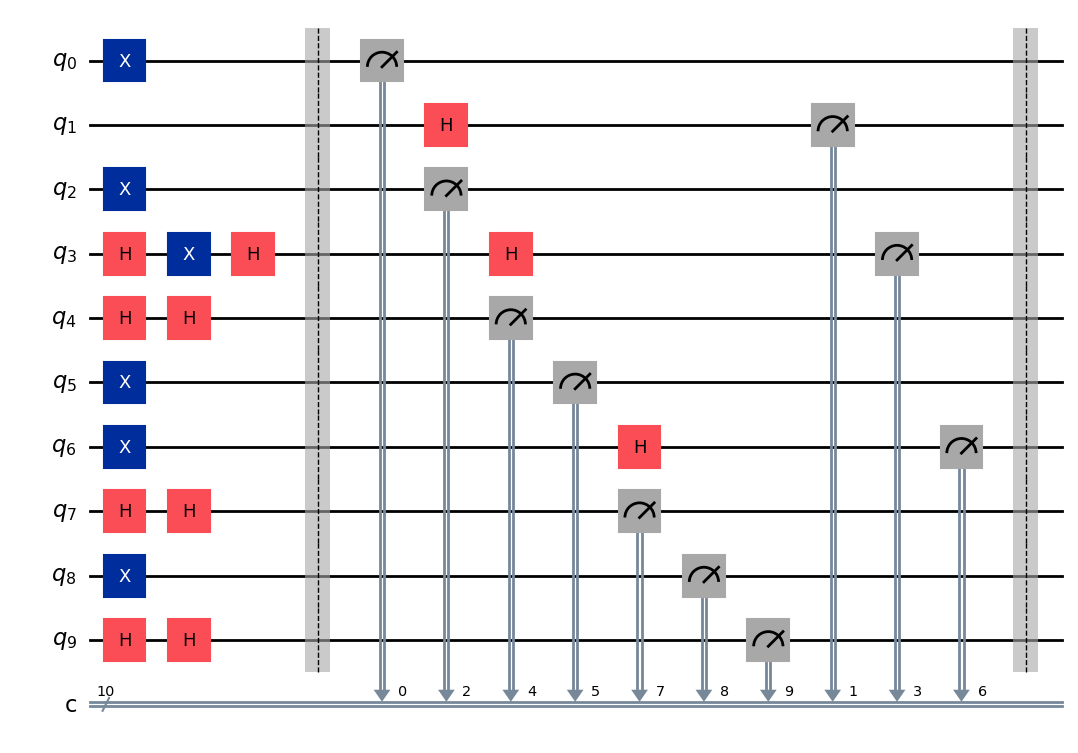

### Key Sifting Process

Alice's bases:        [0 0 0 1 1 0 0 1 0 1]
Bob's bases:          [0 1 0 1 0 0 1 0 0 0]
Matching bases at positions:  [0, 2, 3, 5, 8]
Sifted key:           [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
Initial bits          [1 0 1 1 0 1 1 0 1 0]
Final bits:           [0 1 0 0 1 0 0 1 1 1]


### Circuit Diagram: Qubit State After Creation

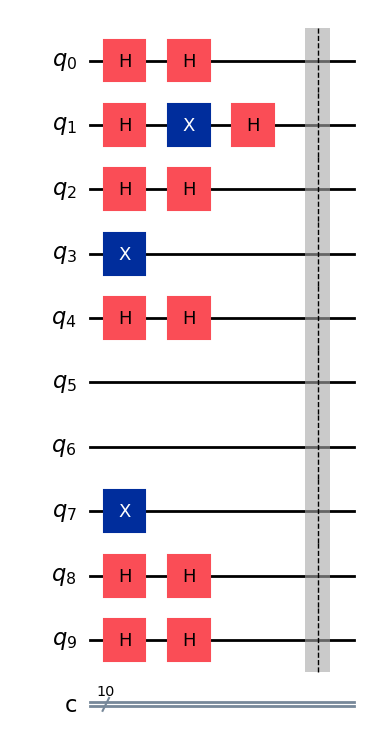

### Circuit Diagram: With Eavesdropping

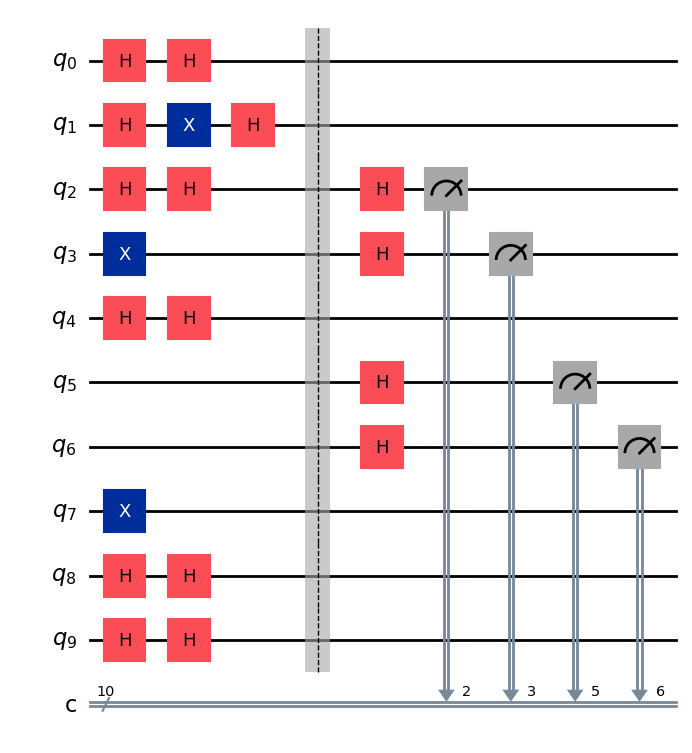

Initial Bits:         [0 1 0 1 0 0 0 1 0 0]
After Eavesdropping:  [0 0 0 1 0 0 0 1 0 0]


### Recipient Reading Data from Quantum Bits

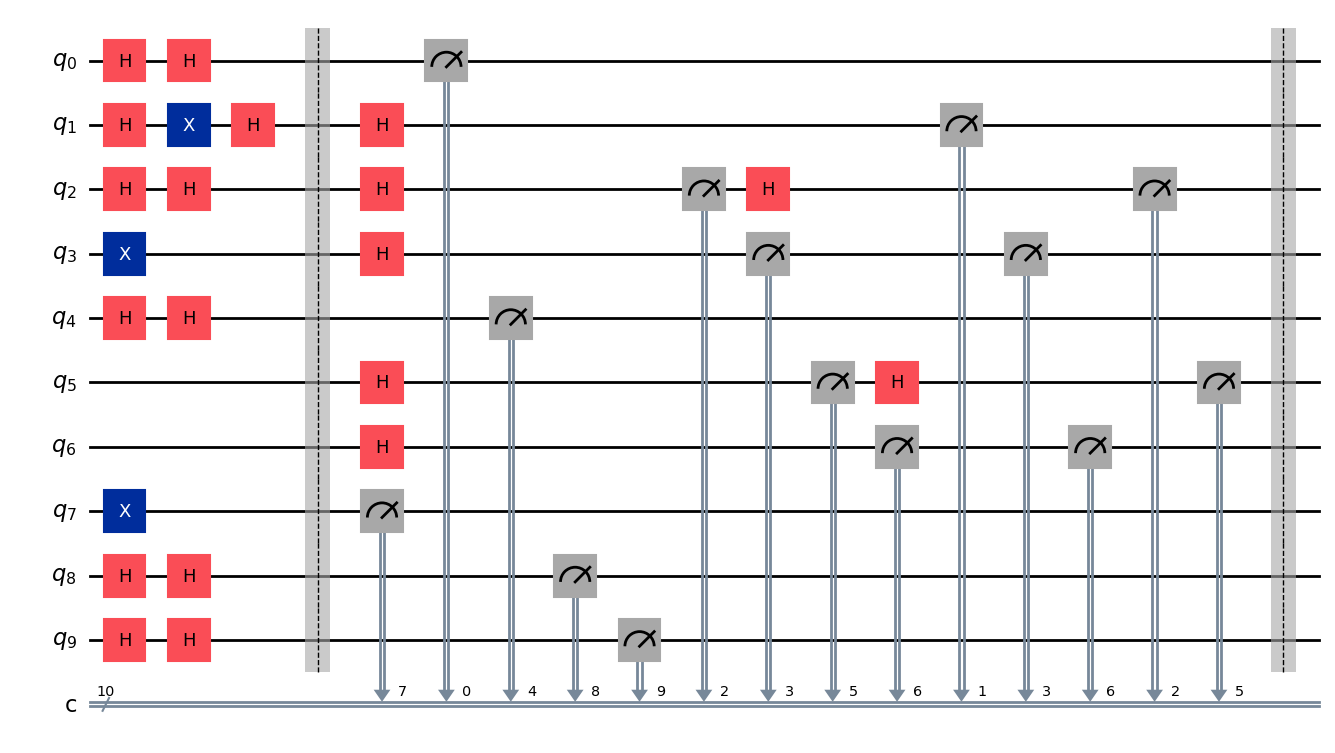

Initial Bits:         [0 1 0 1 0 0 0 1 0 0]
After Eavesdropping:  [0 0 0 1 0 0 0 1 0 0]
Final Bits:       [0 0 1 1 1 0 0 1 1 0]


### Key Sifting Process

Alice's bases:        [1 1 1 0 1 0 0 0 1 1]
Bob's bases:          [0 1 1 0 0 1 0 0 0 0]
Matching bases at positions:  [1, 2, 3, 6, 7]
Sifted key:           [np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1)]


### Conclusion

Eavesdropping Detected:  True


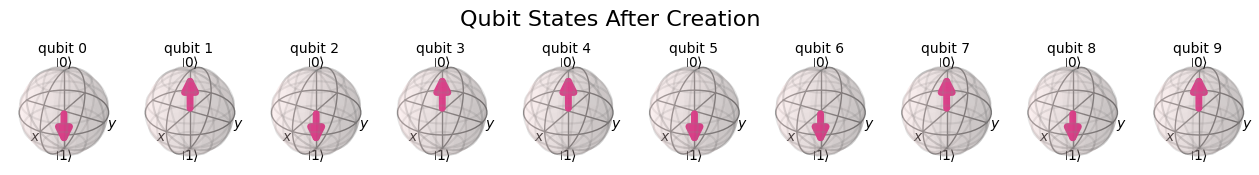

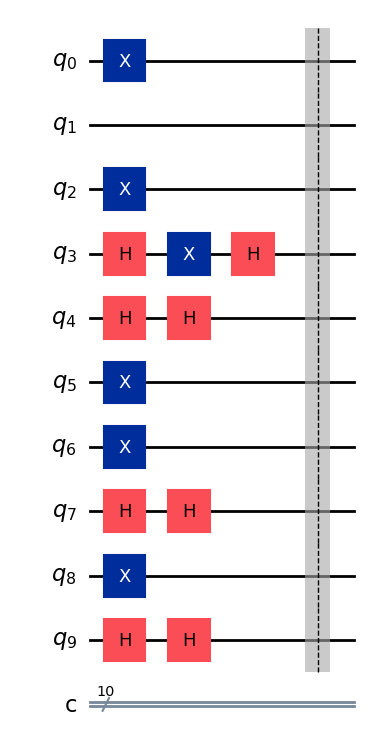

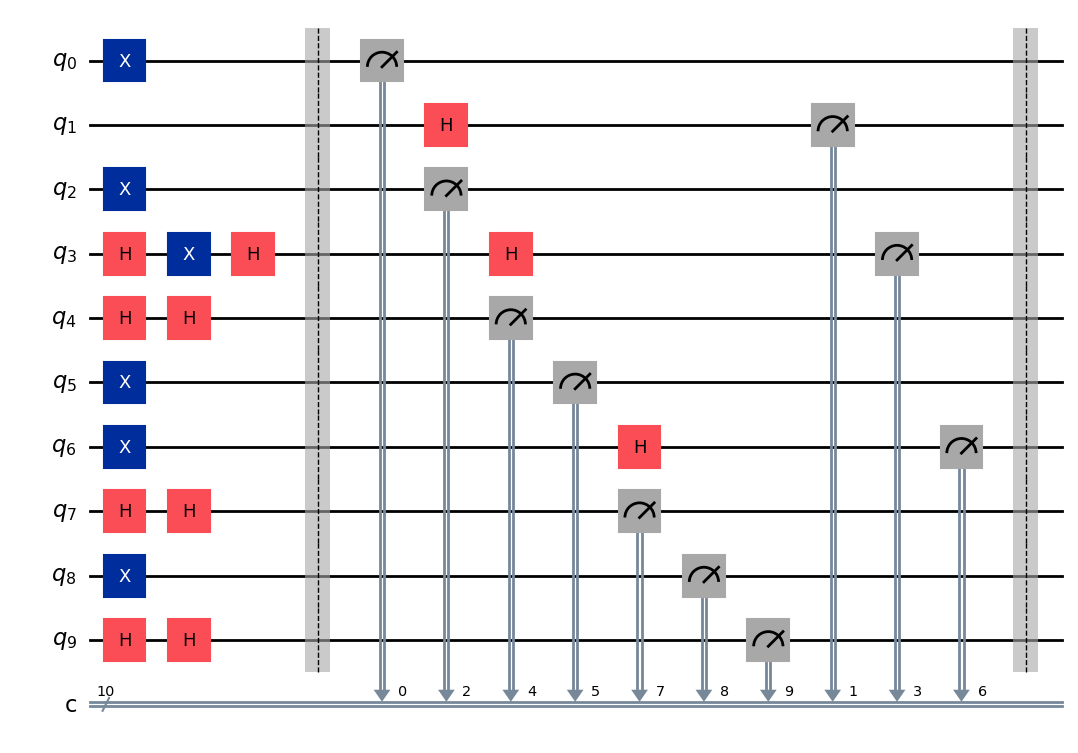

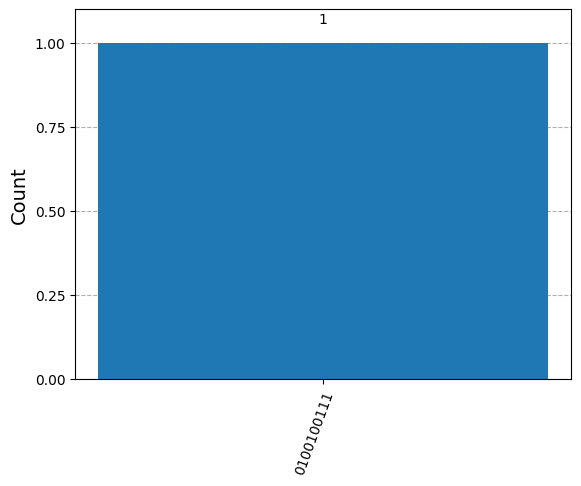

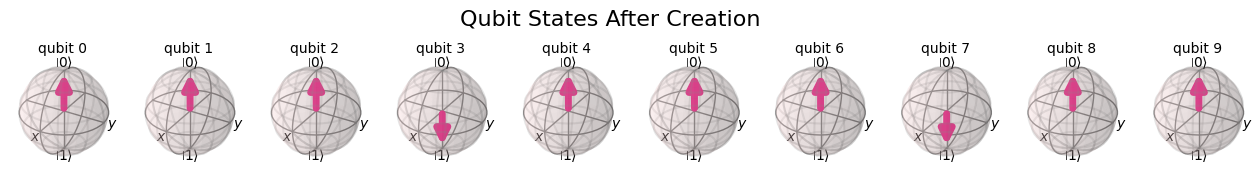

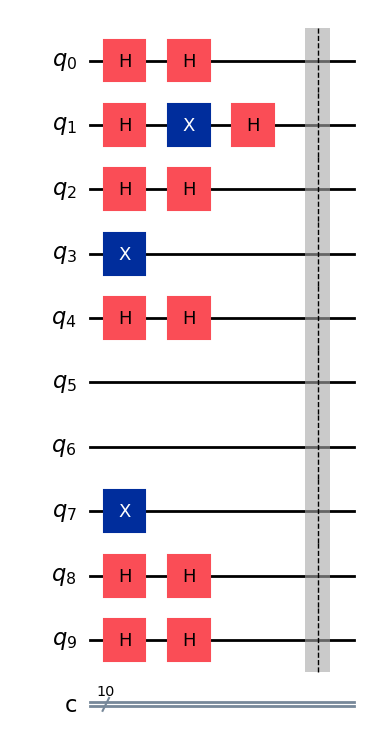

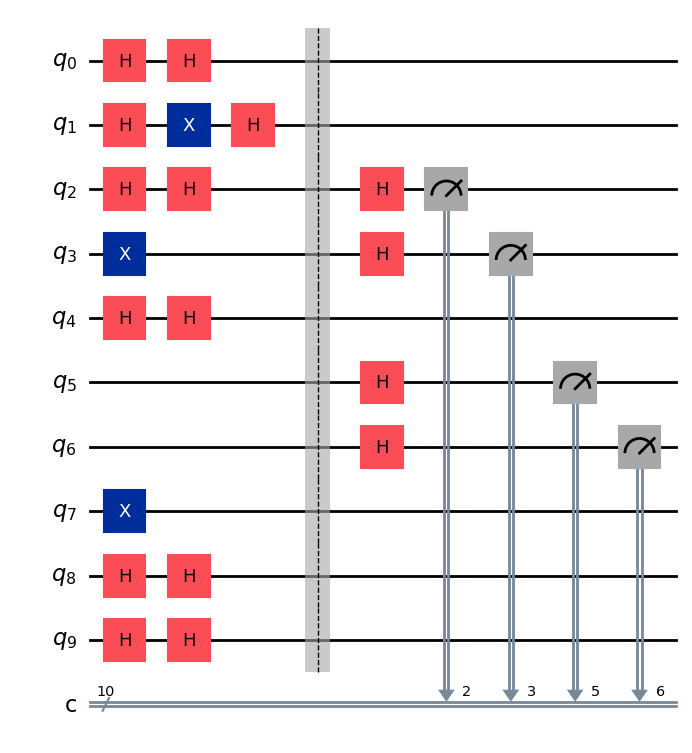

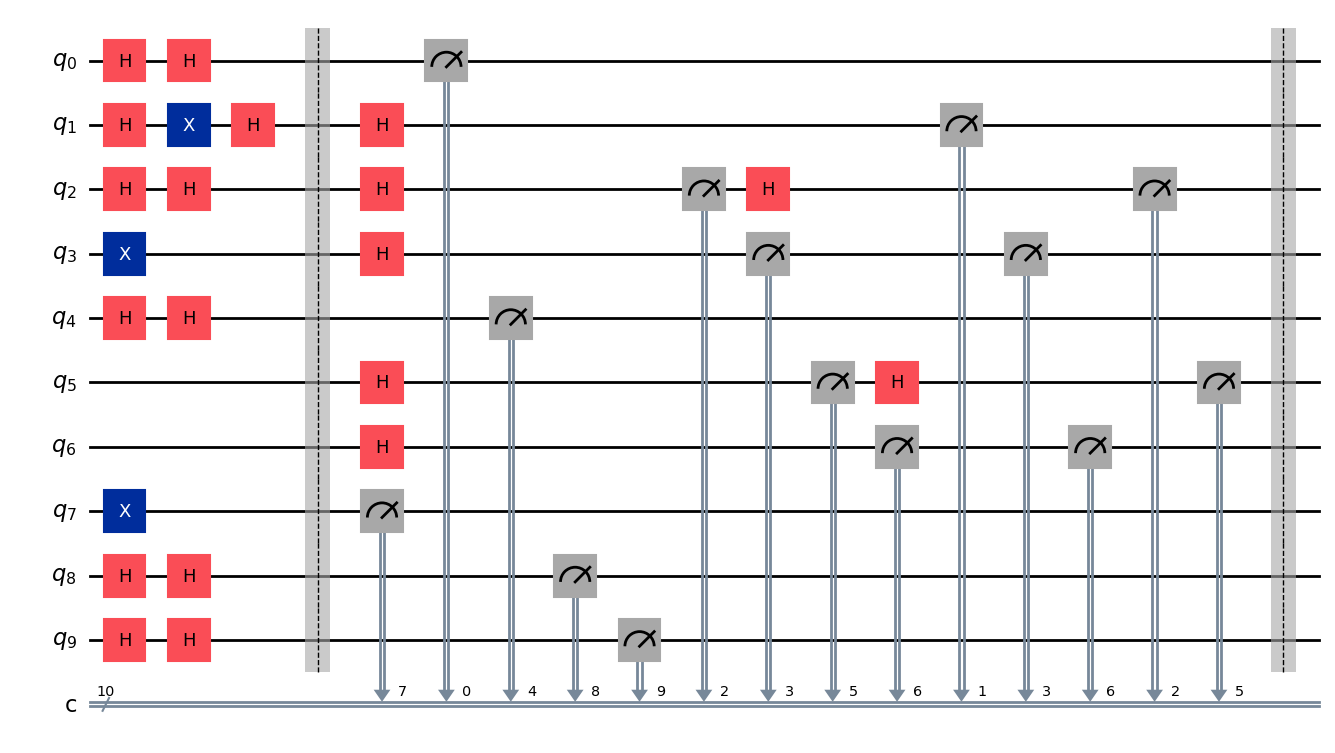

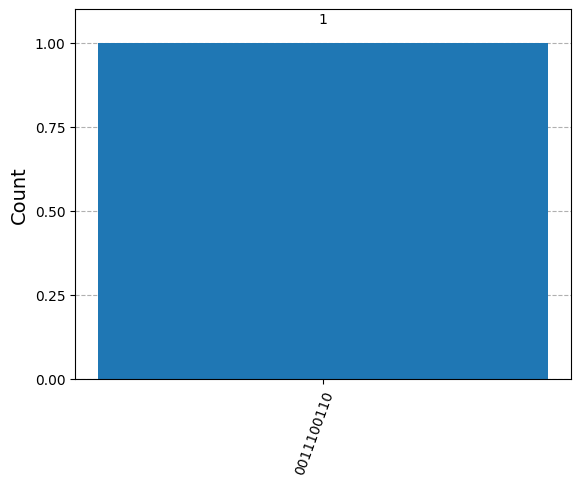

In [4]:
# Function to simulate eavesdropping (Eve's interference by measuring qubits randomly)
def eavesdrop(qc, num_qubits):
    eve_bases = np.random.randint(2, size=num_qubits) # Randomly choose a basis (0 or 1) for each qubit
    for i, base in enumerate(eve_bases):
        if base == 1: # Apply Hadamard gate if Eve chooses to measure in X-basis
            qc.h(i)
            qc.measure(i, i) # Eve measures the qubits, potentially disturbing the quantum state
     return eve_bases # Return the bases Eve used for her measurement   

# Function to visualize the circuit after eavesdropping has taken place
def visualize_eavesdropping(qc):
    display(Markdown("### Circuit Diagram: With Eavesdropping")) # Display markdown header
    display(qc.draw(output='mpl')) # Display the circuit diagram showing Eve's interference


In [ ]:
# Function to sift the key and visualize the matching bases between Alice and Bob
def sift_and_visualize(bits, bases, bob_bases):
    display(Markdown("### Key Sifting Process")) # Display markdown header
    sifted_key = [] # Initialze the list for the sifted key
    matching_bases = [] # List to store positions where Alice's and Bob's bases match
    
    for i in range(len(bases)): 
        if bases[i] == bob_bases[i]: # If Alice's and Bob's bases match
            sifted_key.append(bits[i]) # Append the corresponding bit to the sifted key
            matching_bases.append(i) # Track the matching position

    # Display the process of matching bases and the resulting sifted key
    print("Alice's bases:       ", bases)
    print("Bob's bases:         ", bob_bases)
    print("Matching bases at positions: ", matching_bases)
    print("Sifted key:          ", sifted_key) 
    return sifted_key # Return the sifted key



In [ ]:
# Function to convert a bit string to a human-readable format for printing
def string_to_bit_array(bits):
    result = "[" # Start the formatted string
    for i, character in enumerate(bits):
        result += character
        if i != len(bits) - 1: # Add space between bits but not at the end
            result += " "
    result += "]" # Close the formatted string
    return result
    
# Simulation without eavesdropping (normal communication)


num_qubits = 10 # Number of qubits to simulate (representing 10 bits)
alice_bits = np.random.randint(2, size=num_qubits) # Alice randomly generates 0/1 bits
alice_bases = np.random.randint(2, size=num_qubits) # Alice randomly chooses 0/1 bases (Z or X basis)
bob_bases = np.random.randint(2, size=num_qubits) # Bob randomly chooses 0/1 bases for measurement

# Create the BB84 circuit and visualize the initial qubits states
bb84_circ, bits, bases = create_bb84_circuit(alice_bits, alice_bases)
visualize_qubit_creation(bb84_circ) 

# Bob measures the qubits in his selected bases
measure_in_bases(bb84_circ, bob_bases) 
visualize_measure_in_bases(bb84_circ) 

# Transpile and run the circuit on the simulator
compiled_circuit = transpile(bb84_circ, simulator) # Transpile the circuit for simulation
job = simulator.run(compiled_circuit, shots=1) # Execute the circuit with 1 shot (single measurement)
result = job.result()  # Get the simulation result
counts = result.get_counts(bb84_circ) # Get the measurement counts (final bits)

# Display the result as a histogram
plot_histogram(counts) 
sifted_key = sift_and_visualize(bits, bases, bob_bases) # Perform key sifting

# Print initial and final bitstrings (before and after transmission)
print("Initial bits         ", bits)
print("Final bits:          ", string_to_bit_array(list(counts.keys())[0]))

# Simulation with eavesdropping (Eve's interference)

# Repeat the simulation with eavesdropping
num_qubits = 10 # Number of qubits
alice_bits = np.random.randint(2, size=num_qubits) # Alice's bits
alice_bases = np.random.randint(2, size=num_qubits) # Alice's bases
bob_bases = np.random.randint(2, size=num_qubits) # Bob's bases

# Create the BB84 circuit and visualize the qubit creation process
bb84_circ, bits, bases = create_bb84_circuit(alice_bits, alice_bases)
visualize_qubit_creation(bb84_circ) 

# Simulate Eve's eavesdropping and visualize the result
eve_bases = eavesdrop(bb84_circ, num_qubits) 
visualize_eavesdropping(bb84_circ) 

# Run the simulation again after eavesdropping
compiled_circuit = transpile(bb84_circ, simulator) 
job = simulator.run(compiled_circuit, shots=1) 
result = job.result()
counts = result.get_counts(bb84_circ)
bits_after_eavesdropping = string_to_bit_array(list(counts.keys())[0])

# Display the result of eavesdropping
print("Initial Bits:        ", bits)
print("After Eavesdropping: ", bits_after_eavesdropping)

# Bob measures the qubits after Eve's interference
measure_in_bases(bb84_circ, bob_bases) 
visualize_measure_in_bases(bb84_circ) 

# Final simulation and output after eavesdropping and measurement
compiled_circuit = transpile(bb84_circ, simulator) 
job = simulator.run(compiled_circuit, shots=1) 
result = job.result()
counts = result.get_counts(bb84_circ)

# Print final bits after eavesdropping and sifting process
print("Initial Bits:        ", bits)
print("After Eavesdropping: ", bits_after_eavesdropping)
print("Final Bits:      ", string_to_bit_array(list(counts.keys())[0]))

# Visualize the histogram and sift the key
plot_histogram(counts) 
sifted_key = sift_and_visualize(bits, bases, bob_bases) 

# Conclusion: Display if eavesdropping was detected
display(Markdown("### Conclusion"))
print("Eavesdropping Detected: ", np.any(alice_bases != eve_bases)) # Check if any basis mismatch occurred due to Eve
